Задание Ultra Lite

Создайте модель для распознавания рукописных цифр из набора MNIST (можно воспользоваться ноутбуком 1-го занятия) и проведите ряд тестов:

Запустите сеть с различными размерами обучающей и проверочной выборок:

Размер test_size=0.1
Размер test_size=0.5
Размер test_size=0.9

Напишите выводы, как изменение test_size влияет на точность сети.

In [ ]:
# Подключение всех необходимых библиотек 

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
from google.colab import files
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd  
%matplotlib inline


## Для начала подготовим данные для обучения

In [ ]:
# Загрузим данные MNIST
(x_train_org, y_train_org),(x_test_org, y_test_org)= mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
#Меняем формат входных картинок с 28х28 на 784х1
x_train = x_train_org.reshape(60000,784)
x_test = x_test_org.reshape(10000, 784)
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
# Нормализуем входные данные. В промежутке от 0 до 1
x_train = x_train.astype('float32')
x_train = x_train / 255

x_test = x_test.astype('float32')
x_test = x_test / 255

In [ ]:
# Преобразование ответов в формат one_hot_encoding
y_train = utils.to_categorical(y_train_org,10)
y_test = utils.to_categorical(y_test_org,10)

Проведем ряд тестов. Гиперпараметры сети изменяться не будут за исключением test_size

# Тест 1. Размер test_size=0.1

In [ ]:
# Создаем нейронную сеть
model_1 = Sequential()
model_1.add(Dense(100, input_dim = 784, activation = "relu"))
model_1.add(Dense(5000, activation = "relu"))
model_1.add(Dense(10,activation = "softmax"))

model_1.compile(loss="categorical_crossentropy" , optimizer ="adam", metrics = ["accuracy"])

# Обучение нейронной сети
history_1 = model_1.fit (x_train, y_train, batch_size=128, epochs=15,  validation_split=0.1, verbose=1) 

Epoch 1/15
422/422 [==============================] - 9s 21ms/step - loss: 0.4831 - accuracy: 0.8598 - val_loss: 0.1066 - val_accuracy: 0.9688
Epoch 2/15
422/422 [==============================] - 9s 21ms/step - loss: 0.1076 - accuracy: 0.9675 - val_loss: 0.0856 - val_accuracy: 0.9743
Epoch 3/15
422/422 [==============================] - 9s 22ms/step - loss: 0.0712 - accuracy: 0.9773 - val_loss: 0.0853 - val_accuracy: 0.9758
Epoch 4/15
422/422 [==============================] - 9s 21ms/step - loss: 0.0559 - accuracy: 0.9827 - val_loss: 0.0740 - val_accuracy: 0.9795
Epoch 5/15
422/422 [==============================] - 9s 21ms/step - loss: 0.0395 - accuracy: 0.9878 - val_loss: 0.0833 - val_accuracy: 0.9768
Epoch 6/15
422/422 [==============================] - 9s 21ms/step - loss: 0.0283 - accuracy: 0.9905 - val_loss: 0.0967 - val_accuracy: 0.9750
Epoch 7/15
422/422 [==============================] - 9s 21ms/step - loss: 0.0261 - accuracy: 0.9907 - val_loss: 0.0835 - val_accuracy: 0.9798

# Проверим сеть на тестовой выборки с помощью метода evaluate

In [ ]:
scores_1 = model_1.evaluate(x_test, y_test, verbose=1)
print("Доля верных ответов на тестовых данных, в процентах: ", round(scores_1[1] * 100, 4), "%", sep="")

313/313 [==============================] - 1s 3ms/step - loss: 0.0967 - accuracy: 0.9803
Доля верных ответов на тестовых данных, в процентах: 98.03%


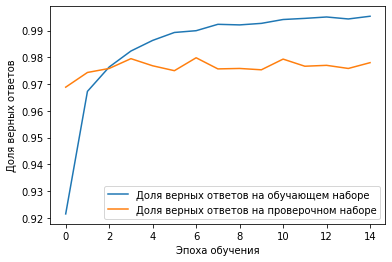

In [ ]:
# Посмотрим как сеть обучалась на графиках 

plt.plot(history_1.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_1.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

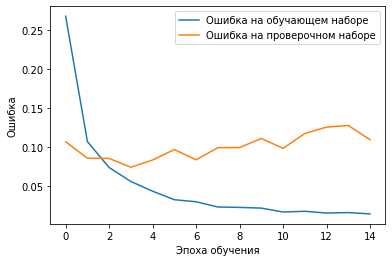

In [ ]:
#Так же посмотрим на график ошибок. На предмет переобучения сети.
plt.plot(history_1.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history_1.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show() 

# Тест 2. Размер test_size=0.5

In [ ]:
# Создаем нейронную сеть
model_2 = Sequential()
model_2.add(Dense(100, input_dim = 784, activation = "relu"))
model_2.add(Dense(5000, activation = "relu"))
model_2.add(Dense(10,activation = "softmax"))

model_2.compile(loss="categorical_crossentropy" , optimizer ="adam", metrics = ["accuracy"])

# Обучение нейронной сети
history_2 = model_2.fit (x_train, y_train, batch_size=128, epochs=15,  validation_split=0.5, verbose=1) 

Epoch 1/15
235/235 [==============================] - 7s 26ms/step - loss: 0.6419 - accuracy: 0.8140 - val_loss: 0.1826 - val_accuracy: 0.9453
Epoch 2/15
235/235 [==============================] - 6s 26ms/step - loss: 0.1445 - accuracy: 0.9537 - val_loss: 0.1491 - val_accuracy: 0.9550
Epoch 3/15
235/235 [==============================] - 6s 26ms/step - loss: 0.0876 - accuracy: 0.9729 - val_loss: 0.1424 - val_accuracy: 0.9582
Epoch 4/15
235/235 [==============================] - 6s 26ms/step - loss: 0.0643 - accuracy: 0.9784 - val_loss: 0.1471 - val_accuracy: 0.9581
Epoch 5/15
235/235 [==============================] - 6s 26ms/step - loss: 0.0450 - accuracy: 0.9867 - val_loss: 0.1450 - val_accuracy: 0.9619
Epoch 6/15
235/235 [==============================] - 6s 26ms/step - loss: 0.0341 - accuracy: 0.9896 - val_loss: 0.1399 - val_accuracy: 0.9636
Epoch 7/15
235/235 [==============================] - 6s 26ms/step - loss: 0.0284 - accuracy: 0.9904 - val_loss: 0.1441 - val_accuracy: 0.9655

# Проверим сеть на тестовой выборки с помощью метода evaluate

In [ ]:
scores_2 = model_2.evaluate(x_test, y_test, verbose=1)
print("Доля верных ответов на тестовых данных, в процентах: ", round(scores_2[1] * 100, 4), "%", sep="")

313/313 [==============================] - 1s 3ms/step - loss: 0.1347 - accuracy: 0.9711
Доля верных ответов на тестовых данных, в процентах: 97.11%


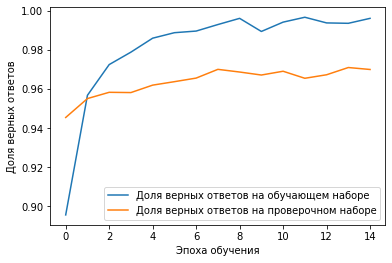

In [ ]:
# Посмотрим как сеть обучалась на графиках 

plt.plot(history_2.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_2.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

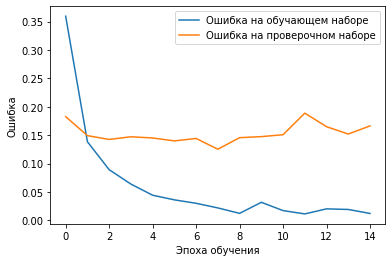

In [ ]:
#Так же посмотрим на график ошибок. На предмет переобучения сети.
plt.plot(history_2.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history_2.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show() 

# Тест 3. Размер test_size=0.9

In [ ]:
# Создаем нейронную сеть
model_3 = Sequential()
model_3.add(Dense(100, input_dim = 784, activation = "relu"))
model_3.add(Dense(5000, activation = "relu"))
model_3.add(Dense(10,activation = "softmax"))

model_3.compile(loss="categorical_crossentropy" , optimizer ="adam", metrics = ["accuracy"])

# Обучение нейронной сети
history_3 = model_3.fit (x_train, y_train, batch_size=128, epochs=15,  validation_split=0.9, verbose=1) 

Epoch 1/15
47/47 [==============================] - 4s 78ms/step - loss: 1.1983 - accuracy: 0.6361 - val_loss: 0.4001 - val_accuracy: 0.8751
Epoch 2/15
47/47 [==============================] - 3s 73ms/step - loss: 0.2562 - accuracy: 0.9272 - val_loss: 0.3105 - val_accuracy: 0.9067
Epoch 3/15
47/47 [==============================] - 3s 73ms/step - loss: 0.1832 - accuracy: 0.9491 - val_loss: 0.2967 - val_accuracy: 0.9124
Epoch 4/15
47/47 [==============================] - 4s 79ms/step - loss: 0.1228 - accuracy: 0.9630 - val_loss: 0.2560 - val_accuracy: 0.9264
Epoch 5/15
47/47 [==============================] - 4s 79ms/step - loss: 0.0851 - accuracy: 0.9780 - val_loss: 0.2529 - val_accuracy: 0.9288
Epoch 6/15
47/47 [==============================] - 4s 78ms/step - loss: 0.0560 - accuracy: 0.9860 - val_loss: 0.2504 - val_accuracy: 0.9316
Epoch 7/15
47/47 [==============================] - 4s 78ms/step - loss: 0.0441 - accuracy: 0.9882 - val_loss: 0.2390 - val_accuracy: 0.9363
Epoch 8/15
47

# Проверим сеть на тестовой выборки с помощью метода evaluate

In [ ]:
scores_3 = model_3.evaluate(x_test, y_test, verbose=1)
print("Доля верных ответов на тестовых данных, в процентах: ", round(scores_3[1] * 100, 4), "%", sep="")

313/313 [==============================] - 1s 3ms/step - loss: 0.2461 - accuracy: 0.9459
Доля верных ответов на тестовых данных, в процентах: 94.59%


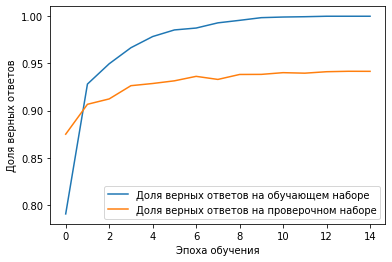

In [ ]:
# Посмотрим как сеть обучалась на графиках 

plt.plot(history_3.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_3.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

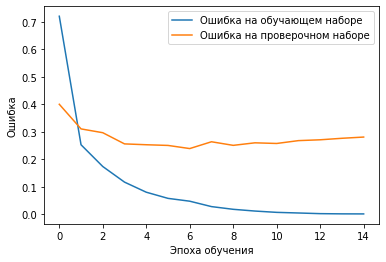

In [ ]:
#Так же посмотрим на график ошибок. На предмет переобучения сети.
plt.plot(history_3.history['loss'], 
         label='Ошибка на обучающем наборе')
plt.plot(history_3.history['val_loss'], 
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Ошибка')
plt.legend()
plt.show() 

# Результаты

Создадим таблицу для наглядности. Сделаем ее универсальной. Возьмем ранее сохраненные значения из соответствующих переменных. Теперь можно перезапускать нейронные сети с разными параметрами и смотреть на данные в таблице просто запустив код

In [ ]:
index = ['1','2','3']
columns= ['Доля верных ответов на обучающем наборе','Ошибка на обучающем наборе',
        'Доля верных ответов на проверочном наборе','Ошибка на проверочном наборе',
        'Доля верных ответов на тестовом наборе', 'Ошибка на тестовом наборе']
data = [[history_1.history['accuracy'][-1], history_1.history['loss'][-1], history_1.history['val_accuracy'][-1], history_1.history['val_loss'][-1], 
         scores_1[1],scores_1[0]],
        [history_2.history['accuracy'][-1], history_2.history['loss'][-1], history_2.history['val_accuracy'][-1], history_2.history['val_loss'][-1], 
         scores_2[1],scores_2[0]],
        [history_3.history['accuracy'][-1], history_3.history['loss'][-1], history_3.history['val_accuracy'][-1], history_3.history['val_loss'][-1], 
         scores_3[1],scores_3[0]]]
result = pd.DataFrame(data=data, columns = columns, index = index)
result

,Доля верных ответов на обучающем наборе,Ошибка на обучающем наборе,Доля верных ответов на проверочном наборе,Ошибка на проверочном наборе,Доля верных ответов на тестовом наборе,Ошибка на тестовом наборе
1,0.99537,0.014243,0.978000,0.109304,0.9803,0.096740
2,0.99600,0.012056,0.969867,0.166283,0.9711,0.134661
3,1.00000,0.001334,0.941649,0.280843,0.9459,0.246105


# Выводы

Общие:

  - С помощью проверчной выборки можно смотреть на реальные значения нейронной сети. Так как на проверочных данных она не обучалась, поэтому по этим значениям можно судить о работе нашей сети. 


  - Так же с помощью значений полученных из проверочной выборки можно построить график и проанализировать его. 

  При test_size = 0.1 начиная с **4** эпохи начала возрастать ошибка.

  При test_size = 0.5 начиная с **8** эпохи начала возрастать ошибка.

  При test_size = 0.9 начиная с **7** эпохи начала возрастать ошибка, но очень медленно.

  Видно что присутствует переобучение сети.


  - Чем больше мы веделяем примеров для проверочной выборки, тем меньше остается для обучающей. Что в следствии сказывается на обучаемость сети. Доля верных ответов на проверочном и тестовой наборах падают, а доля ошибок растут.

  - Доля верных ответов на обучающем наборе остается без изменений и  стремиться к 100%. При test_size = 0.9 - 100%, что свидетельствует о переобучении сети.

  - В соответствии с имеющейся базой для обучения нужно самим подбирать процент обучающихся, проверочных и тестовых выборок для достижения наилучшего результата. 
    